## Movie Review Classification

![This is getting exciting](https://i.kinja-img.com/gawker-media/image/upload/s--hIgTSFEs--/c_fit,fl_progressive,q_80,w_320/17j2zn73qxdlfgif.jpg)

Using all that we have learned, we will now combine our techniques to perform some basic classifcation! We'll be using the nltk movie reviews data set, we will classify positive and negative reviews. Here's some code to get you started:

In [480]:
from nltk.corpus import movie_reviews as reviews

X = [reviews.raw(fileid) for fileid in reviews.fileids()]
y = [reviews.categories(fileid)[0] for fileid in reviews.fileids()]

1 - Print a positive and negative review:

In [481]:
print(X[0])
print(y[0])

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

In [482]:
print(X[-1])
print(y[-1])

truman ( " true-man " ) burbank is the perfect name for jim carrey's character in this film . 
president truman was an unassuming man who became known worldwide , in spite of ( or was it because of ) his stature . 
 " truman " also recalls an era of plenty following a grim war , an era when planned communities built by government scientists promised an idyllic life for americans . 
and burbank , california , brings to mind the tonight show and the home of nbc . 
if hollywood is the center of the film world , burbank is , or was , the center of tv's world , the world where our protagonist lives . 
combine all these names and concepts into " truman burbank , " and you get something that well describes him and his artificial world . 
truman leads the perfect life . 
his town , his car , and his wife are picture perfect . 
his idea of reality comes under attack one day when a studio light falls from the sky . 
the radio explains that an overflying airplane started coming apart . 
 . 
 . 
b

In [483]:
len(X)
len(y)

2000

2 - Using the scikit train_test_split function (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), split the data into a training set and a test set. 

In [484]:
#shuffle and randomly select 20% test data and 80% training data; 40 is the randome seed
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=40)

In [485]:
y_train[3]

'neg'

3 - Then lemmatize or stem the reviews, and transform the documents to tf-idf.

In [486]:
import numpy as np
import pandas as pd
import nltk
import re
import os
from sklearn import feature_extraction

In [487]:
#stopwords = nltk.corpus.stopwords.words('english')

In [501]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [638]:
def tokenize_and_stem(text):
    
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [639]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=2000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))


In [640]:
tfidf_matrix_train = tfidf_vectorizer.fit_transform(X_train)

In [641]:
tfidf_matrix_test = tfidf_vectorizer.transform(X_test)

4 - Finally, build a model. To start, use a logistic regression (which we will review in detail in the coming lectures) (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [517]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(tfidf_matrix_train, y_train)



In [536]:
y_pred = logisticRegr.predict(tfidf_matrix_test)

In [533]:
score = logisticRegr.score(tfidf_matrix_test, y_test)
print(score)

0.805


In [558]:
y_pred.tolist()

['neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',


5 - Measure the efficacy of your model using the Reciever Operator Characteristic (ROC) Area Under the Curve (AUC). Report this metric on the test set of your data.

For more info on this, see: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

In [661]:
import numpy as np
from sklearn.metrics import roc_auc_score

test_l = []
for i in y_test:
    if i == 'pos':
        m = 1
    else:
        m = 0
    test_l.append(m)

    
pred_l = []
for i in y_pred.tolist():
    if i == 'pos':
        m=1
    else:
        m = 0
    pred_l.append(m)
    
s1 = roc_auc_score(test_l, pred_l)
print(s1)

0.803693295865


In [620]:
#turn it into a function
def get_auroc_score(y_test,y_pred):
    import numpy as np
    from sklearn.metrics import roc_auc_score

    test_l = []
    for i in y_test:
        if i == 'pos':
            m = 1
        else:
            m = 0
        test_l.append(m)

    
    pred_l = []
    for i in y_pred.tolist():
        if i == 'pos':
            m=1
        else:
            m = 0
        pred_l.append(m)
    
    my_score = roc_auc_score(test_l, pred_l)
    
    return my_score
    

In [599]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(test_l, pred_l, pos_label=1)
roc_auc =auc(fpr, tpr)

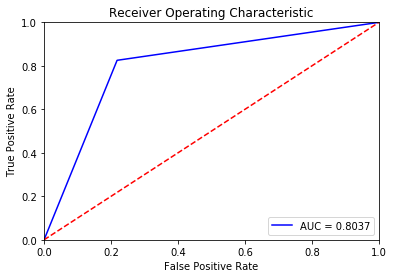

In [601]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr,'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [622]:
#turn it into a function for further use:
def plot_myaoc(y_test,y_pred):
    from sklearn.metrics import roc_curve, auc
    
    test_l = []
    for i in y_test:
        if i == 'pos':
            m = 1
        else:
            m = 0
        test_l.append(m)

    
    pred_l = []
    for i in y_pred.tolist():
        if i == 'pos':
            m=1
        else:
            m = 0
        pred_l.append(m)
    
    

    fpr, tpr, threshold = roc_curve(test_l, pred_l, pos_label=1)
    roc_auc =auc(fpr, tpr)
    
    
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr,'b', label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
                      
                      
                      

6 - Change a parameter in your model (introduce regularization) or change a parameter in your word vector transformation (http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Try introducing the use of stop words, or employing a cutoff on terms with min or max df.

##### I've tried adjust min_df from 0.01 to 0.2, max_df from 0.7 to 0.9, max feature from 150 to 2000, n_gram of 1,2 and 1,3,then beliebe this set up of max 0.8, min 0.01, feature 2000, and n_gram 1,3 is a good combination with 80% accuracy


### Model 2: no stop word
#Also, I want to try lemmatization instead of stemming instead of stem, that's model 3
#Finally, let me adjust regularization in the regression model, model 4

In [615]:


from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer_2 = TfidfVectorizer(max_df=0.8, max_features=2000,
                                 min_df=0.01, stop_words=None,
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))



In [616]:
tfidf_matrix_train_2 = tfidf_vectorizer_2.fit_transform(X_train)
tfidf_matrix_test_2 = tfidf_vectorizer_2.transform(X_test)

In [617]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(tfidf_matrix_train_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [618]:
y_pred_2 = logisticRegr.predict(tfidf_matrix_test_2)

In [619]:
score_2 = logisticRegr.score(tfidf_matrix_test_2, y_test)
print(score_2)

0.8175


In [668]:
s2=get_auroc_score(y_test,y_pred_2)
print(s2)

0.81909875552


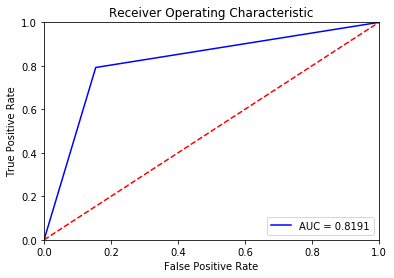

In [624]:
plot_myaoc(y_test,y_pred_2)

### Model 3: lemmatization instead of stemming

In [627]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [628]:
def tokenize_and_lemmatize(text):
    
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lemma = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lemma


In [631]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer_3 = TfidfVectorizer(max_df=0.8, max_features=2000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_lemmatize, ngram_range=(1,3))


In [632]:
tfidf_matrix_train_3 = tfidf_vectorizer_3.fit_transform(X_train)
tfidf_matrix_test_3 = tfidf_vectorizer_3.transform(X_test)

In [633]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(tfidf_matrix_train_3, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [634]:
y_pred_3 = logisticRegr.predict(tfidf_matrix_test_3)
score_3 = logisticRegr.score(tfidf_matrix_test_3, y_test)
print(score_3)

0.8


In [671]:
s3 =get_auroc_score(y_test,y_pred_3)

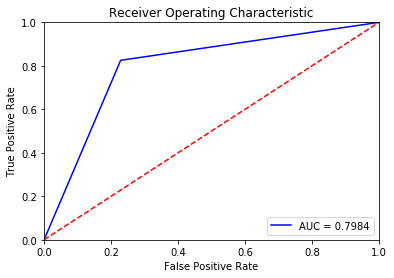

In [672]:
plot_myaoc(y_test,y_pred_3)

### Model 4: reduce regularization

In [652]:
#Use the base model tfidf matrix: tfidf_matrix_train and tfidf_matrix_test
from sklearn.linear_model import LogisticRegression
logisticRegr_reduce = LogisticRegression(C=10000000)
logisticRegr_reduce.fit(tfidf_matrix_train, y_train)


LogisticRegression(C=10000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [653]:
y_pred_4 = logisticRegr_reduce.predict(tfidf_matrix_test)

In [654]:
score_4 = logisticRegr_reduce.score(tfidf_matrix_test, y_test)
print(score_4)

0.7875


In [675]:
s4 = get_auroc_score(y_test,y_pred_4)
print(s4)

0.786882778001


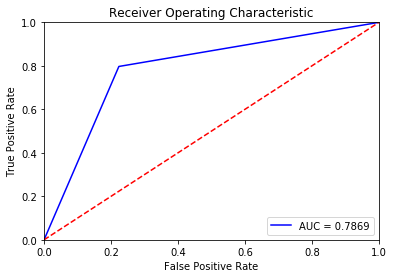

In [656]:
plot_myaoc(y_test,y_pred_4)

7 - Make four models in total, changing parameters and comparing the AUC results. Report your findings in a tabular form.

In [677]:
#!pip install tabulate
from tabulate import tabulate
print(tabulate([['Model 1: Base Model', s1], ['Model 2: No Stop Words', s2],
               ['Model 3: Lemmatization', s3], ['Model 4: Reduce Regularization', s4]], headers=['Model', 'AUROC Score']))

Model                             AUROC Score
------------------------------  -------------
Model 1: Base Model                  0.803693
Model 2: No Stop Words               0.819099
Model 3: Lemmatization               0.798374
Model 4: Reduce Regularization       0.786883
